In [1]:
# Pandas: manejo y análisis de datos tabulares (CSV, Excel, DataFrames)
import pandas as pd

# NumPy: operaciones numéricas y lógicas vectorizadas
import numpy as np

# Matplotlib: generación de gráficos
import matplotlib.pyplot as plt

In [2]:
# Cargar la base de datos desde un archivo CSV
# Si el separador fuera ';', usar sep=';'
df = pd.read_csv("suelo v3.csv", sep=";")

# Visualizar las primeras filas para verificar la carga
df.head()

,Estaciones,Fecha,Parametro,Resultado,ECA Suelo 2017 Suelo Industrial
0,SUELO-01,1/07/2020,Arsenico,230.90,140.0
1,SUELO-01,1/07/2020,Bario total,69.00,2000.0
2,SUELO-01,1/07/2020,Cadmio,1.21,22.0
3,SUELO-01,1/07/2020,Cromo total,7.60,1000.0
4,SUELO-01,1/07/2020,Cromo VI,0.40,1.4


In [3]:
for col in df.columns:
    print(repr(col))

'Estaciones'
'Fecha'
'Parametro'
'Resultado'
'ECA Suelo 2017 Suelo Industrial'


In [4]:
# Convertir la columna Fecha a formato fecha (datetime)
df["Fecha"] = pd.to_datetime(df["Fecha"])

# Asegurar que Resultado y ECA sean valores numéricos
# errors='coerce' convierte valores no numéricos en NaN
df["Resultado"] = pd.to_numeric(df["Resultado"], errors="coerce")
df["ECA Suelo 2017 Suelo Industrial"] = pd.to_numeric(df["ECA Suelo 2017 Suelo Industrial"], errors="coerce")

# Ordenar los datos por estación, fecha y parámetro
df = df.sort_values(["Estaciones", "Fecha", "Parametro"])

In [5]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 278
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Estaciones                       280 non-null    object        
 1   Fecha                            280 non-null    datetime64[ns]
 2   Parametro                        280 non-null    object        
 3   Resultado                        280 non-null    float64       
 4   ECA Suelo 2017 Suelo Industrial  280 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 13.1+ KB


,Estaciones,Fecha,Parametro,Resultado,ECA Suelo 2017 Suelo Industrial
0,SUELO-01,2020-01-07,Arsenico,230.90,140.0
1,SUELO-01,2020-01-07,Bario total,69.00,2000.0
2,SUELO-01,2020-01-07,Cadmio,1.21,22.0
7,SUELO-01,2020-01-07,Cianuro Libre,0.50,8.0
4,SUELO-01,2020-01-07,Cromo VI,0.40,1.4


In [6]:
df["Cumple"] = np.where(
    df["Resultado"] <= df["ECA Suelo 2017 Suelo Industrial"], 1, 0
)

df["Estado"] = np.where(
    df["Cumple"] == 1, "Cumple", "No cumple"
)

df.head()


,Estaciones,Fecha,Parametro,Resultado,ECA Suelo 2017 Suelo Industrial,Cumple,Estado
0,SUELO-01,2020-01-07,Arsenico,230.90,140.0,0,No cumple
1,SUELO-01,2020-01-07,Bario total,69.00,2000.0,1,Cumple
2,SUELO-01,2020-01-07,Cadmio,1.21,22.0,1,Cumple
7,SUELO-01,2020-01-07,Cianuro Libre,0.50,8.0,1,Cumple
4,SUELO-01,2020-01-07,Cromo VI,0.40,1.4,1,Cumple


In [7]:
excedencias = df[df["Cumple"] == 0]
excedencias

,Estaciones,Fecha,Parametro,Resultado,ECA Suelo 2017 Suelo Industrial,Cumple,Estado
0,SUELO-01,2020-01-07,Arsenico,230.9,140.0,0,No cumple
8,SUELO-01,2021-01-11,Arsenico,347.9,140.0,0,No cumple
16,SUELO-01,2022-01-11,Arsenico,310.0,140.0,0,No cumple
18,SUELO-01,2022-01-11,Cadmio,730.0,22.0,0,No cumple
24,SUELO-01,2023-01-11,Arsenico,393.9,140.0,0,No cumple
26,SUELO-01,2023-01-11,Cadmio,2086.0,22.0,0,No cumple
40,SUELO-02,2020-01-07,Arsenico,544.5,140.0,0,No cumple
46,SUELO-02,2020-01-07,Plomo,1077.7,800.0,0,No cumple
48,SUELO-02,2021-01-11,Arsenico,492.2,140.0,0,No cumple
54,SUELO-02,2021-01-11,Plomo,1934.3,800.0,0,No cumple


In [8]:
# Eliminar filas sin resultado o ECA
df_valid = df.dropna(subset=["Resultado", "ECA Suelo 2017 Suelo Industrial"])



In [9]:
def estadisticos_por_parametro(grupo):
    """
    Calcula estadísticos ambientales para un parámetro
    """

    # Valor máximo
    idx_max = grupo["Resultado"].idxmax()
    valor_max = grupo.loc[idx_max, "Resultado"]
    fecha_max = grupo.loc[idx_max, "Fecha"]
    estacion_max = grupo.loc[idx_max, "Estaciones"]

    # Valor mínimo
    idx_min = grupo["Resultado"].idxmin()
    valor_min = grupo.loc[idx_min, "Resultado"]
    fecha_min = grupo.loc[idx_min, "Fecha"]
    estacion_min = grupo.loc[idx_min, "Estaciones"]

    # Excedencias ECA
    excedencias = grupo["Resultado"] > grupo["ECA Suelo 2017 Suelo Industrial"]
    n_excedencias = excedencias.sum()

    # Número de valores
    n_valores = len(grupo)

    # Porcentaje de excedencias
    porcentaje_excedencias = (n_excedencias / n_valores) * 100

    return pd.Series({
        "Valor máximo registrado": valor_max,
        "Fecha muestreo máx": fecha_max.date(),
        "Estación valor máx": estacion_max,
        "Valor mínimo registrado": valor_min,
        "Fecha muestreo mín": fecha_min.date(),
        "Estación valor mín": estacion_min,
        "N° excedencias ECA": n_excedencias,
        "% excedencias": round(porcentaje_excedencias, 2),
        "N° de valores": n_valores
    })



In [10]:
# Aplicar análisis estadístico por parámetro
estadisticos_parametro = (
    df_valid
    .groupby("Parametro")
    .apply(estadisticos_por_parametro)
    .reset_index()
)

C:\Users\Joaquin\AppData\Local\Temp\ipykernel_19036\4198434365.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(estadisticos_por_parametro)


In [11]:

estadisticos_parametro


,Parametro,Valor máximo registrado,Fecha muestreo máx,Estación valor máx,Valor mínimo registrado,Fecha muestreo mín,Estación valor mín,N° excedencias ECA,% excedencias,N° de valores
0,Arsenico,1651.30,2020-01-07,SUELO-05,45.70,2024-01-11,SUELO-05,27,77.14,35
1,Bario total,163.00,2024-01-11,SUELO-03,19.00,2022-01-11,SUELO-02,0,0.00,35
2,Cadmio,9353.00,2023-01-11,SUELO-05,0.36,2020-01-07,SUELO-05,14,40.00,35
3,Cianuro Libre,0.50,2020-01-07,SUELO-01,0.50,2020-01-07,SUELO-01,0,0.00,35
4,Cromo VI,0.40,2020-01-07,SUELO-01,0.30,2021-01-11,SUELO-01,0,0.00,35
5,Cromo total,39.20,2023-01-11,SUELO-01,2.10,2022-01-11,SUELO-03,0,0.00,35
6,Mercurio,0.31,2020-01-07,SUELO-04,0.06,2021-01-11,SUELO-05,0,0.00,35
7,Plomo,1934.30,2021-01-11,SUELO-02,27.20,2022-01-11,SUELO-05,5,14.29,35


In [12]:
# Exportar a Excel
ruta_salida = "analisis_estadistico_suelo_por_parametro.xlsx"

estadisticos_parametro.to_excel(
    ruta_salida,
    index=False,
    sheet_name="Resumen_Estadistico"
)

print("Archivo Excel generado correctamente:", ruta_salida)

Archivo Excel generado correctamente: analisis_estadistico_suelo_por_parametro.xlsx


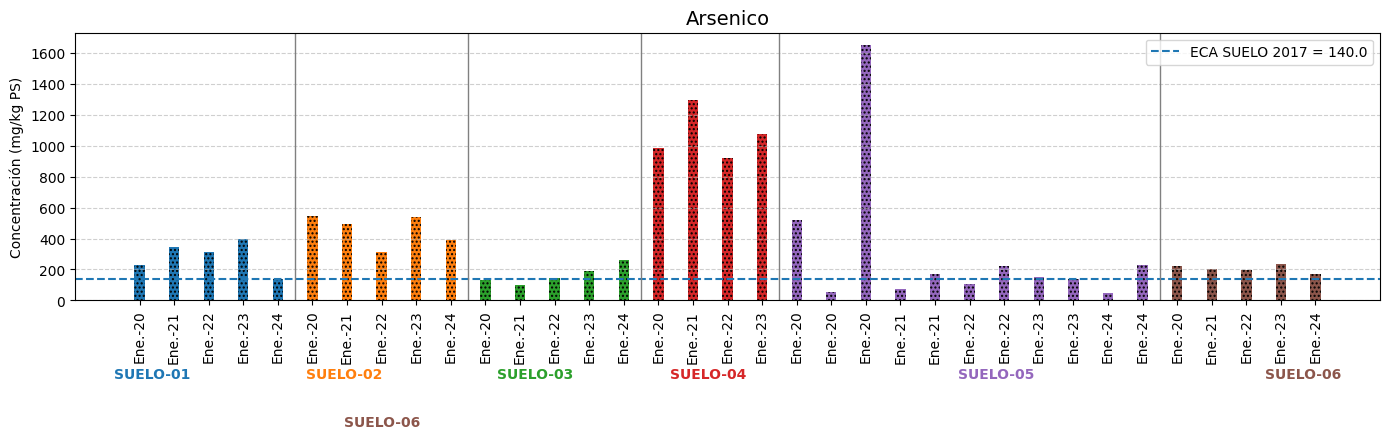

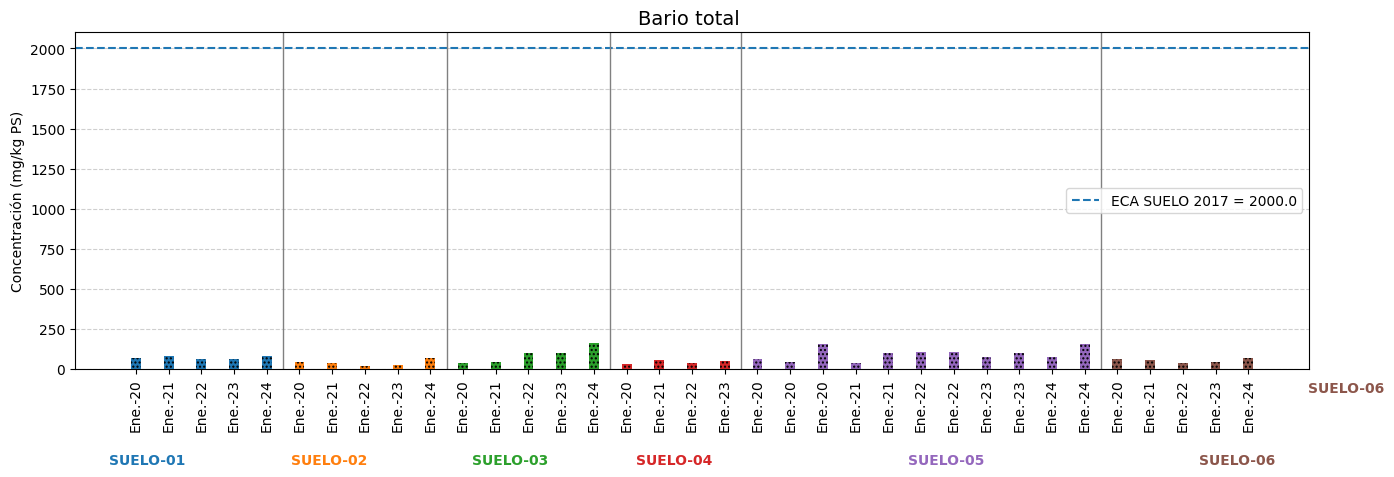

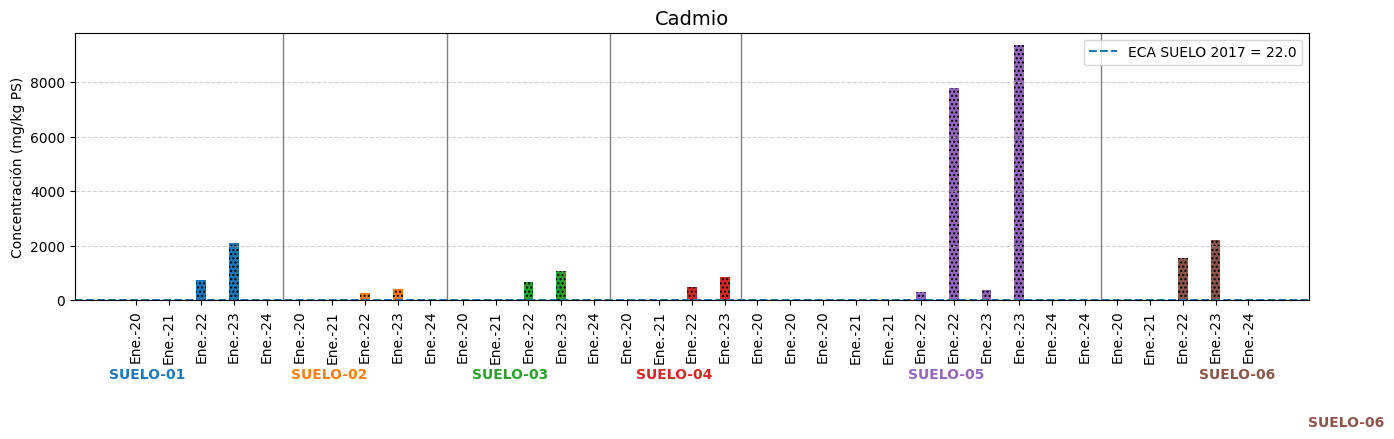

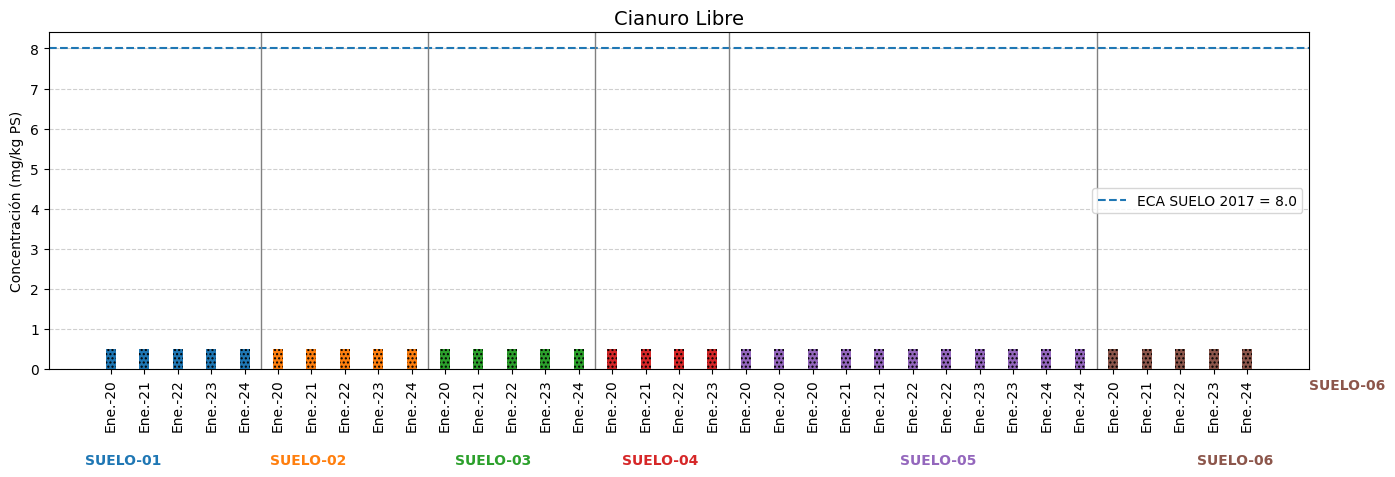

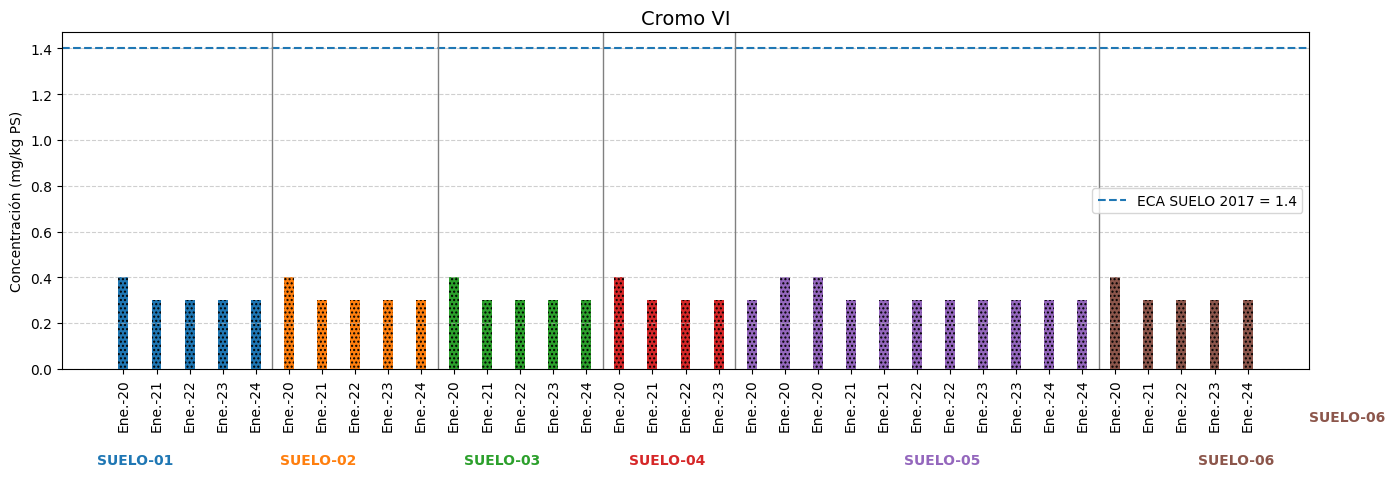

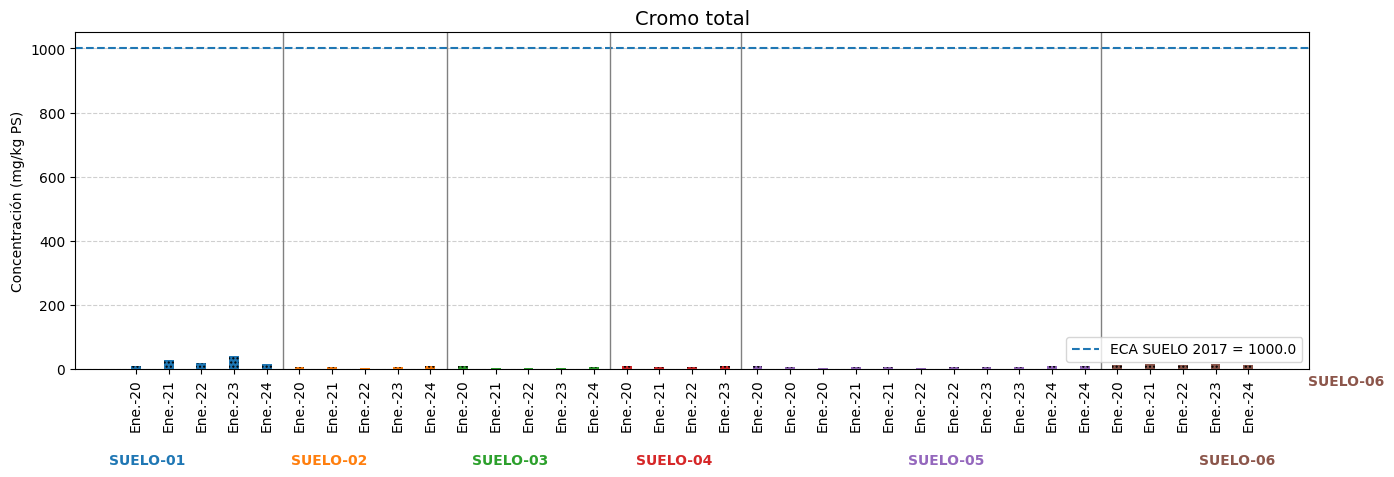

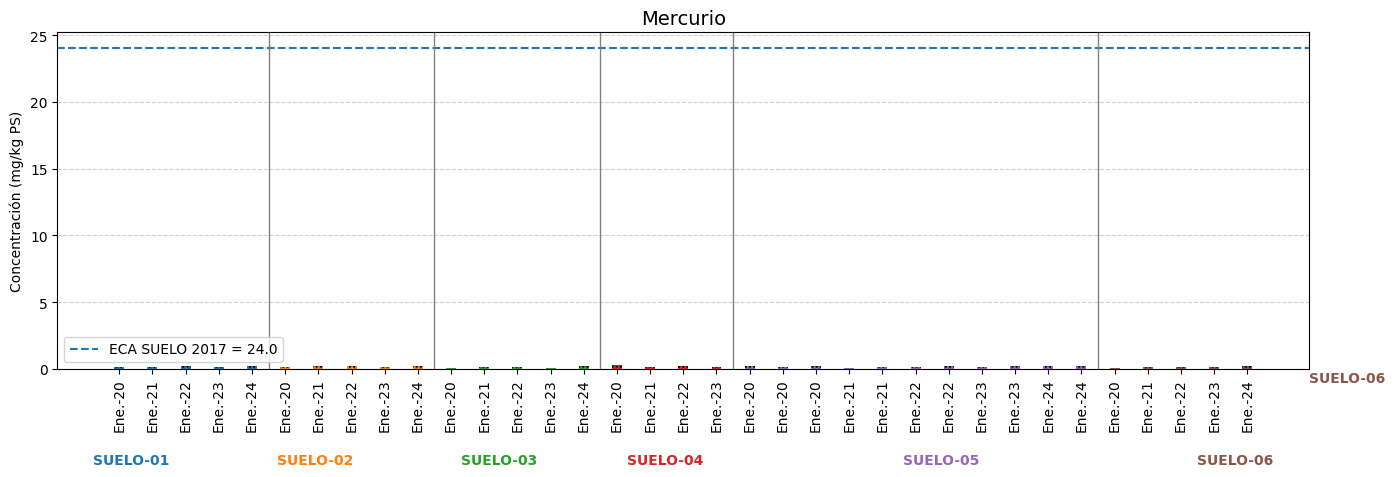

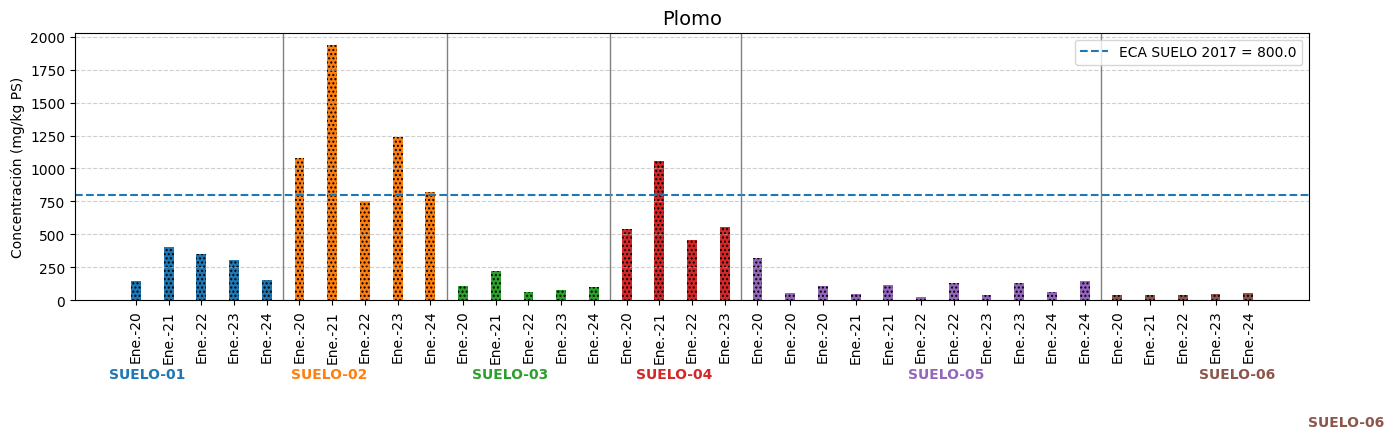

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import os

ruta_salida = r"C:\Users\Joaquin\Desktop\EVALUACION DE LA CALIDAD AMBIENTAL\graficos_png"
os.makedirs(ruta_salida, exist_ok=True)

for parametro in df_valid["Parametro"].unique():
    
    data = df_valid[df_valid["Parametro"] == parametro].copy()
    data = data.sort_values(["Estaciones", "Fecha"])
    
    data["Fecha_str"] = data["Fecha"].dt.strftime("%b-%y")
    eca = data["ECA Suelo 2017 Suelo Industrial"].iloc[0]
    
    x = np.arange(len(data))
    
    # ---- COLORES POR ESTACIÓN ----
    estaciones_unicas = data["Estaciones"].unique()
    colores = plt.cm.tab10(range(len(estaciones_unicas)))
    color_estacion = dict(zip(estaciones_unicas, colores))
    colores_barras = data["Estaciones"].map(color_estacion)
    
    plt.figure(figsize=(14, 5))
    
    plt.bar(
        x,
        data["Resultado"],
        width=0.3,
        color=colores_barras,
        hatch="...."
    )
    
    # Línea ECA
    plt.axhline(
        y=eca,
        linestyle="--",
        linewidth=1.5,
        label=f"ECA SUELO 2017 = {eca:.1f}"
    )
    
    # ---- ETIQUETA SOLO EN EL VALOR MÁXIMO ----
    idx_max = data["Resultado"].idxmax()
    pos_max = data.index.get_loc(idx_max)
    val_max = data.loc[idx_max, "Resultado"]
    
    plt.text(
    pos + (n - 1) / 2,
    -max(data["Resultado"]) * 0.45,  # ← más abajo
    est,
    ha="center",
    va="top",
    fontsize=10,
    fontweight="bold",
    color=color_estacion[est]
    )
    
    # Eje X (fechas verticales)
    plt.xticks(x, data["Fecha_str"], rotation=90)
    
    # Separación visual por estación
    estaciones = data["Estaciones"].values
    for i in range(1, len(estaciones)):
        if estaciones[i] != estaciones[i - 1]:
            plt.axvline(i - 0.5, color="gray", linewidth=1)
    
    # Nombre de estaciones abajo
    # ---- NOMBRE DE ESTACIONES ABAJO (SOLO UNA VEZ) ----
    ax = plt.gca()

    pos = 0
    total = len(data)

    for est in estaciones_unicas:
        n = (data["Estaciones"] == est).sum()
    
        x_rel = (pos + (n - 1) / 2) / (total - 1)
    
        ax.text(
            x_rel,
            -0.25,                 # posición fija debajo del eje X
            est,
            transform=ax.transAxes,
            ha="center",
            va="top",
            fontsize=10,
            fontweight="bold",
            color=color_estacion[est]
        )
    
        pos += n

    
    plt.title(parametro, fontsize=14)
    plt.ylabel("Concentración (mg/kg PS)")
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    
    plt.tight_layout()
    
    nombre_archivo = parametro.replace(" ", "_").replace("/", "_")
    plt.savefig(
        os.path.join(ruta_salida, f"{nombre_archivo}.png"),
        dpi=300,
        bbox_inches="tight"
    )
    
    plt.show()
    plt.close()

